### Solution By: Vipin Choudhary
Last updated Octiber 02, 2020
___
### Project - Term Deposit Sale
### Problem Statement:
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Objective:
##### Identify potential customers who are relatively more likely to subscribe term deposit

### Github Link:

#### Import Library, Load Data & Basic Checks

In [292]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

In [345]:
df = pd.read_csv('C:/Users/N724237/Downloads/term deposit sale Random forest/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [346]:
df.shape

(45211, 17)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### As we can see, 9 out of 17 fields are objects. Lets convert the columns with an 'object' datatype into categorical variables

In [348]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [349]:
df.info() #Checking if all object type columns have been converted into categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [350]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

##### There is no unique element in the dataframe

In [351]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [352]:
df[df['balance']<-5000.00].head(200) # Checking for the outliers




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


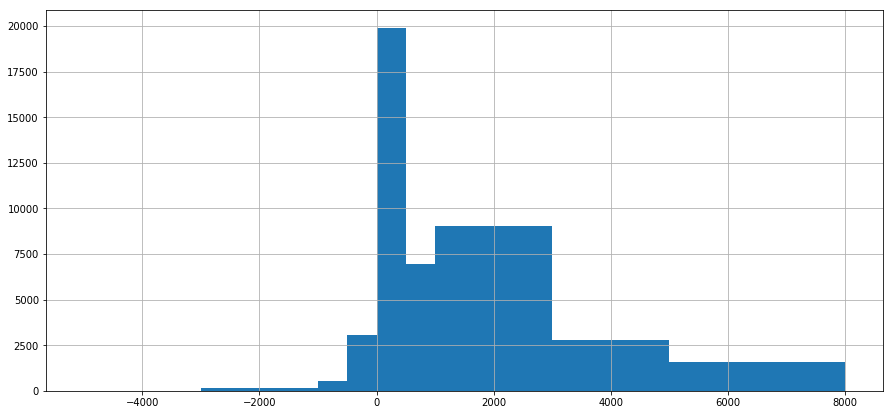

In [353]:
plt.figure(figsize=(15,7))
df.balance.hist(bins=[-5000,-3000,-1000,-500,0,500,1000,3000,5000,8000]);
plt.show()

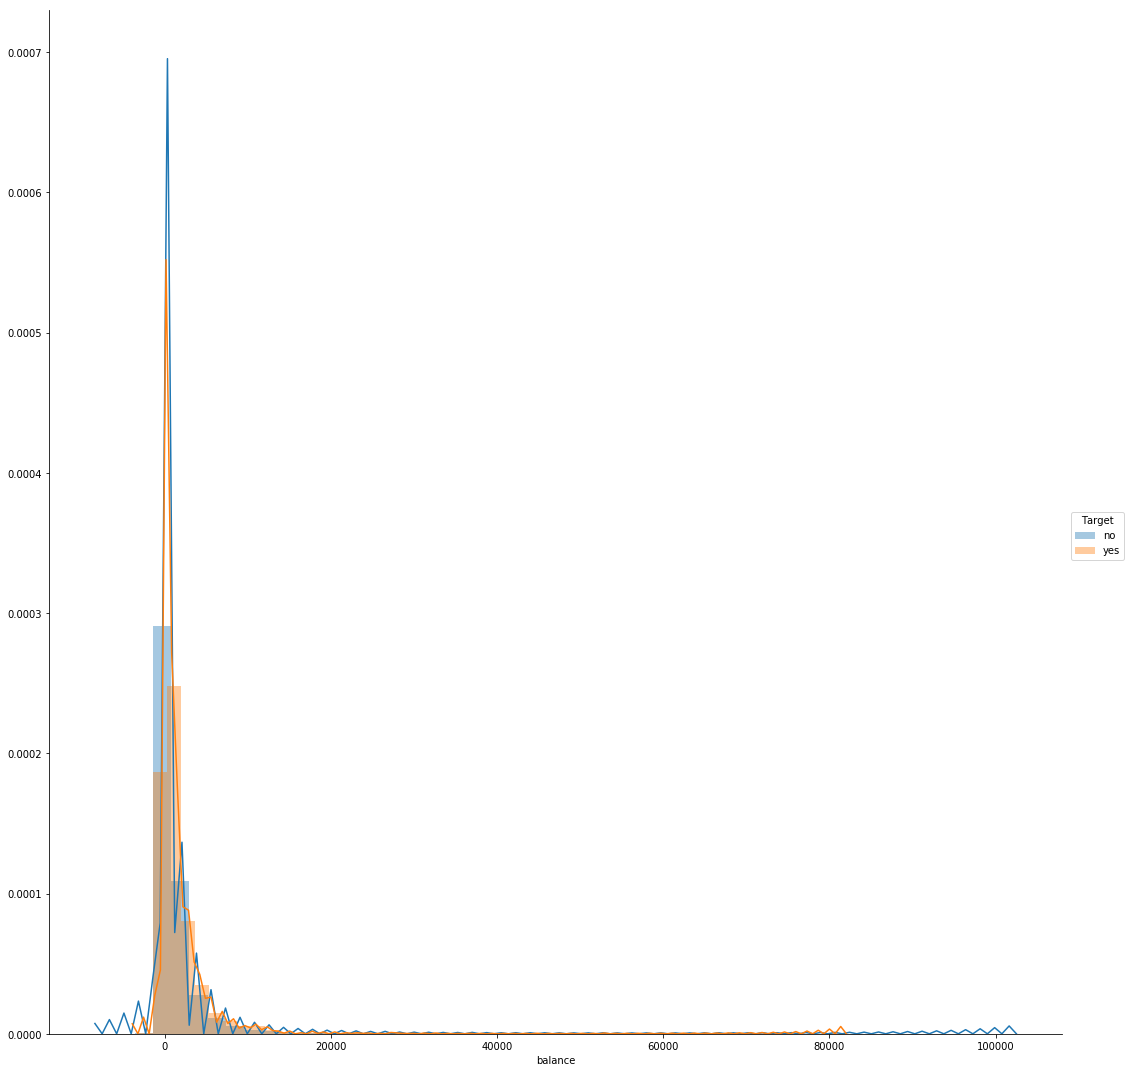

In [354]:
sns.FacetGrid(df,hue="Target",size =15).map(sns.distplot,"balance").add_legend()

In [355]:
df.loc[df.balance <-5000 , "balance"] = -5000

In [356]:
df[df['balance']<-4999.00].head(200) # Checking for the outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
12909,26,blue-collar,single,secondary,yes,-5000,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-5000,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


In [357]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

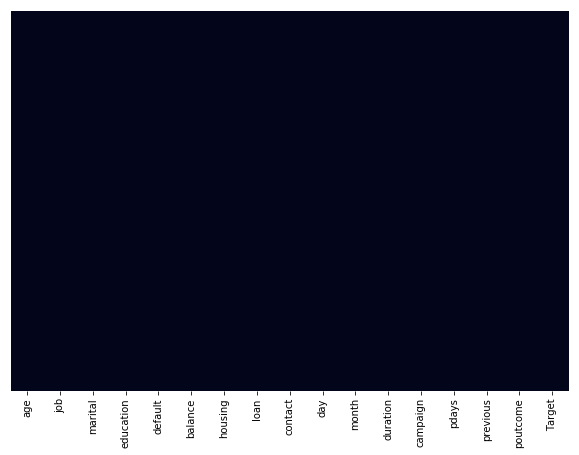

In [358]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False ,cbar=False);

#### Value count of all catagorical columns

In [359]:
df['job'].value_counts(True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [360]:
df['marital'].value_counts(True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [361]:
df['education'].value_counts(True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [362]:
df['default'].value_counts(True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [363]:
df['housing'].value_counts(True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [364]:
df['loan'].value_counts(True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [365]:
df['contact'].value_counts(True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [366]:
df['month'].value_counts(True)

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

In [367]:
df['poutcome'].value_counts(True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

In [368]:
df['Target'].value_counts(True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

## Univariate & Bivariate Analysis

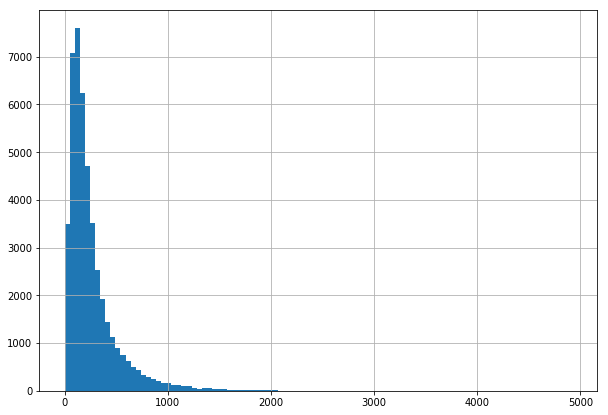

In [369]:
plt.figure(figsize=(10,7))
df.duration.hist(bins=100);
plt.show()

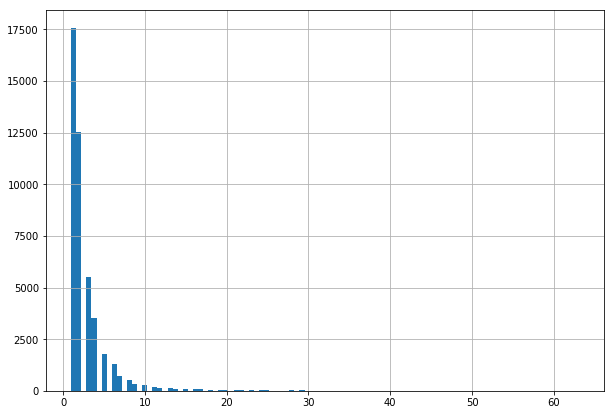

In [370]:
plt.figure(figsize=(10,7))
df.campaign.hist(bins=100);
plt.show()

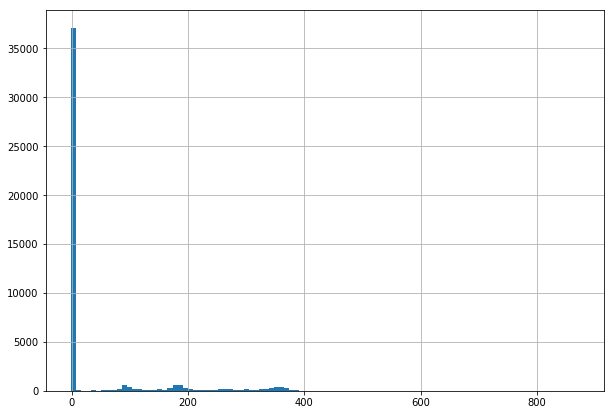

In [371]:
plt.figure(figsize=(10,7))
df.pdays.hist(bins=100);
plt.show()

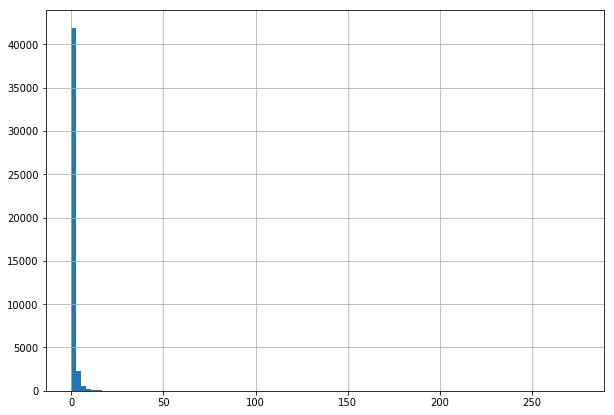

In [372]:
plt.figure(figsize=(10,7))
df.previous.hist(bins=100);
plt.show()

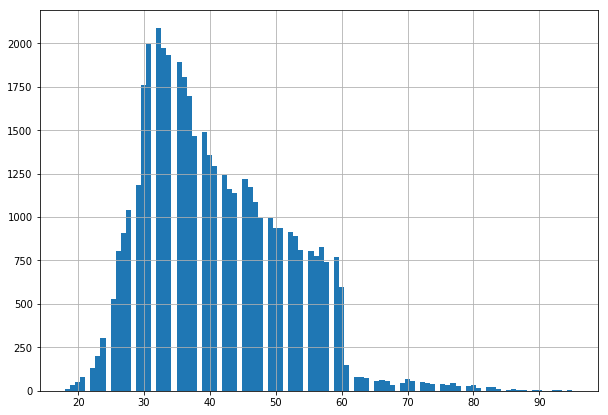

In [373]:
plt.figure(figsize=(10,7))
df.age.hist(bins=100);
plt.show()

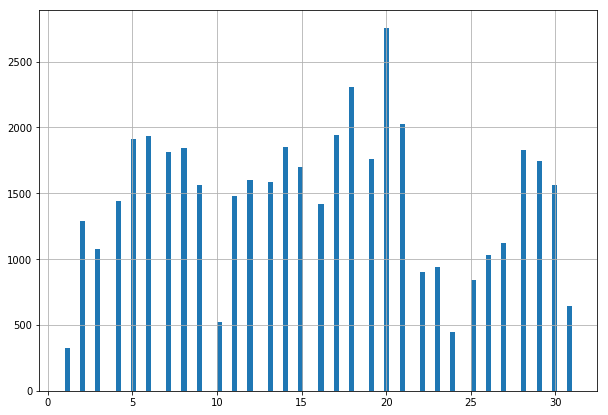

In [374]:
plt.figure(figsize=(10,7))
df.day.hist(bins=100);
plt.show()

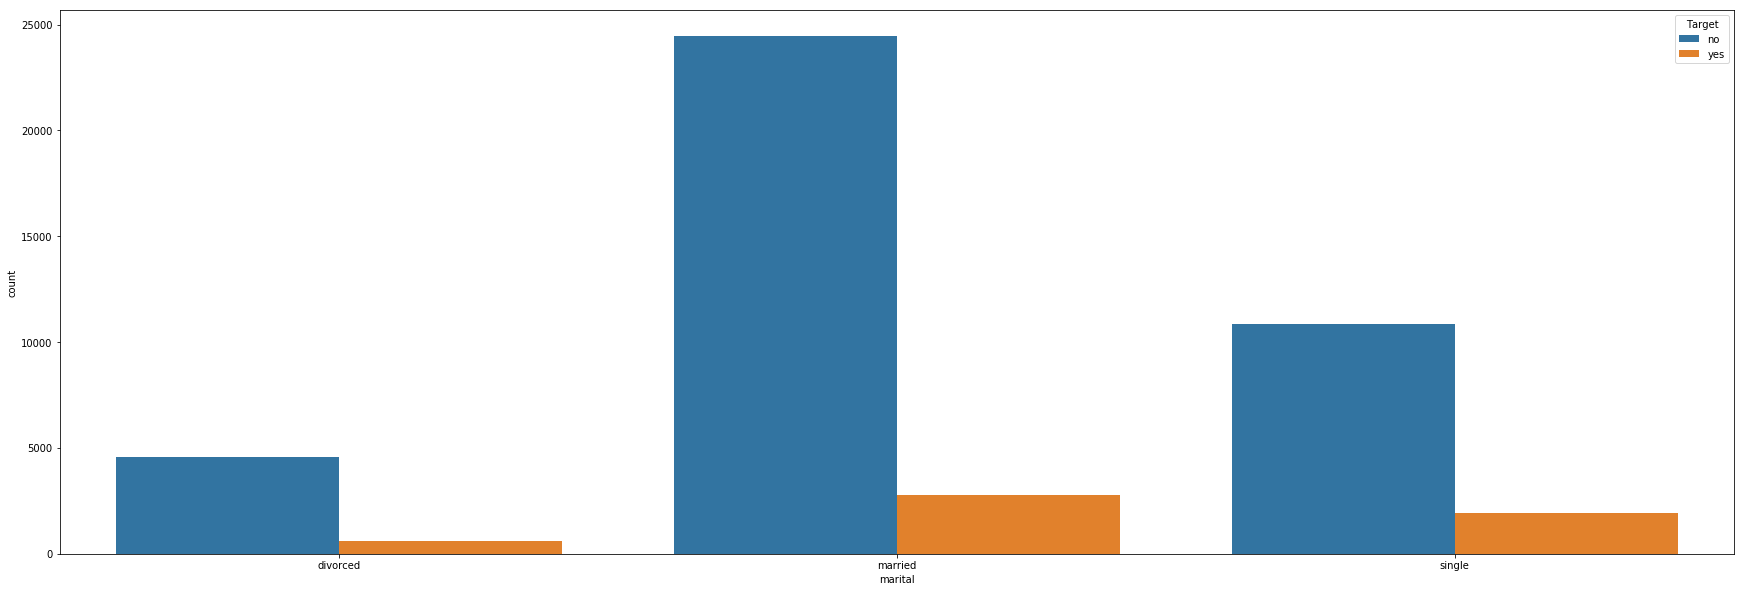

In [375]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['marital'],hue=df['Target'])

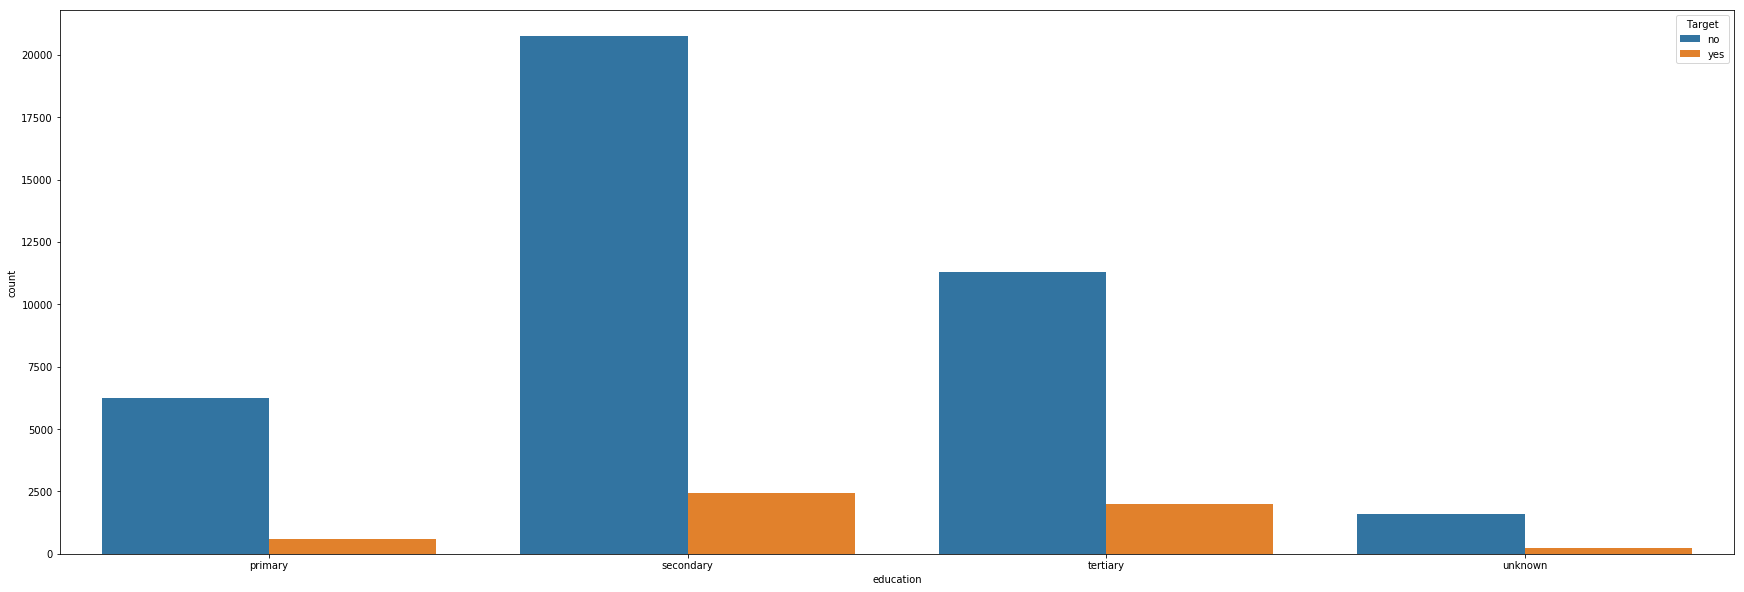

In [376]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['education'],hue=df['Target'])

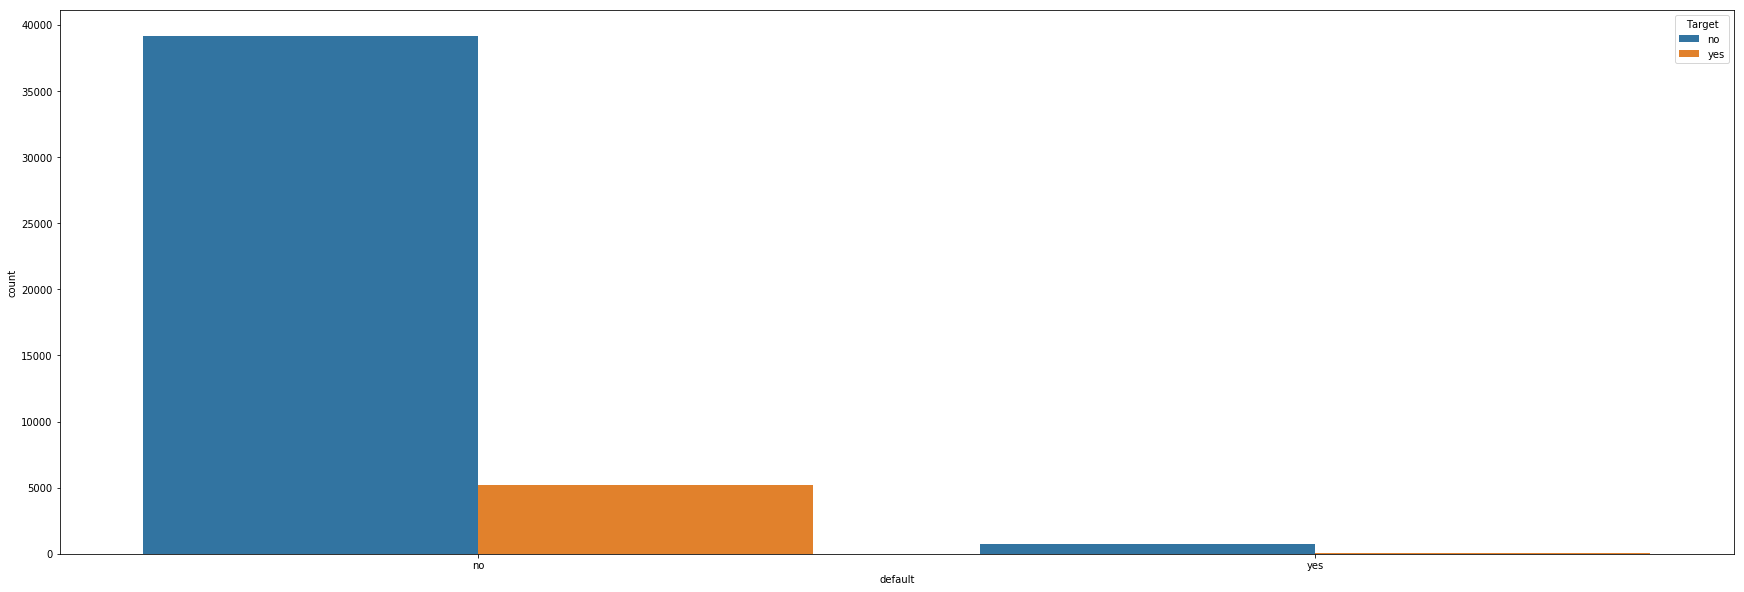

In [377]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['default'],hue=df['Target'])


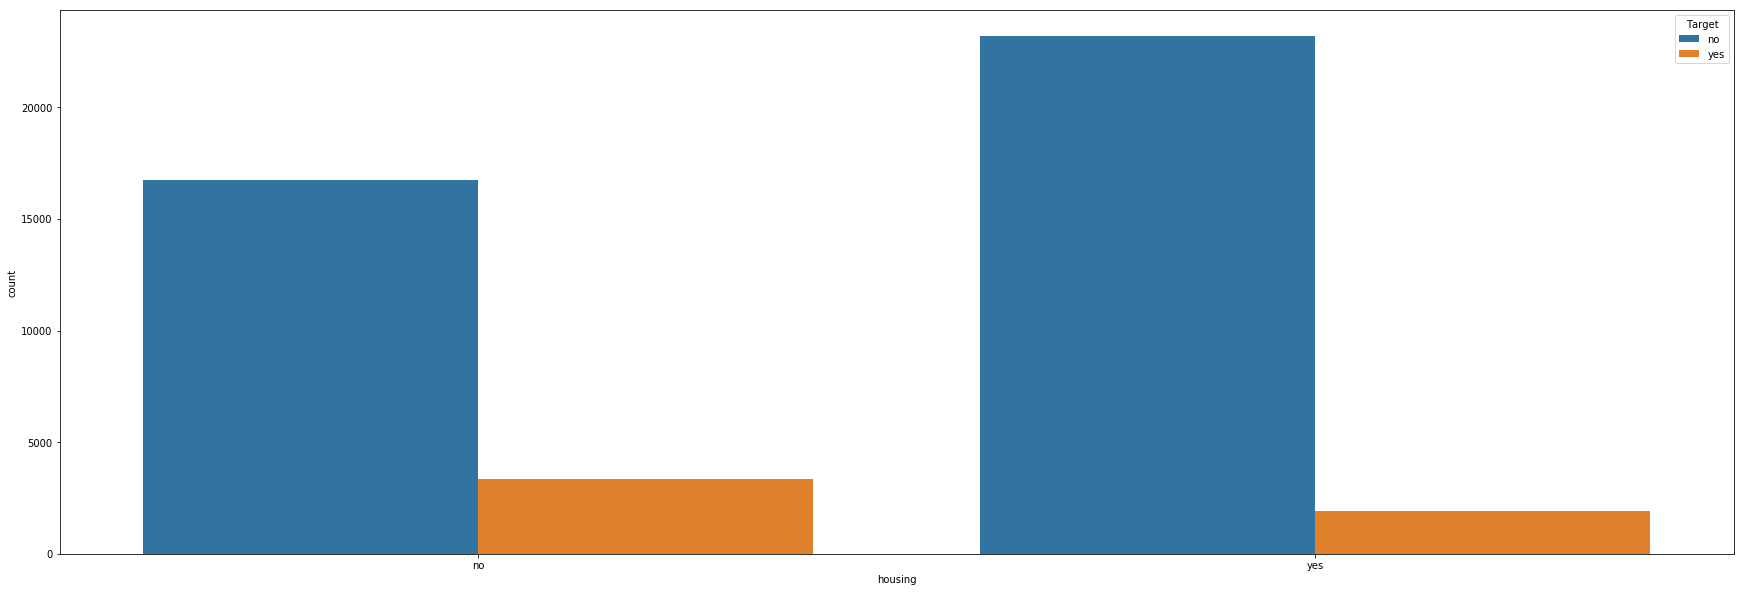

In [378]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['housing'],hue=df['Target'])

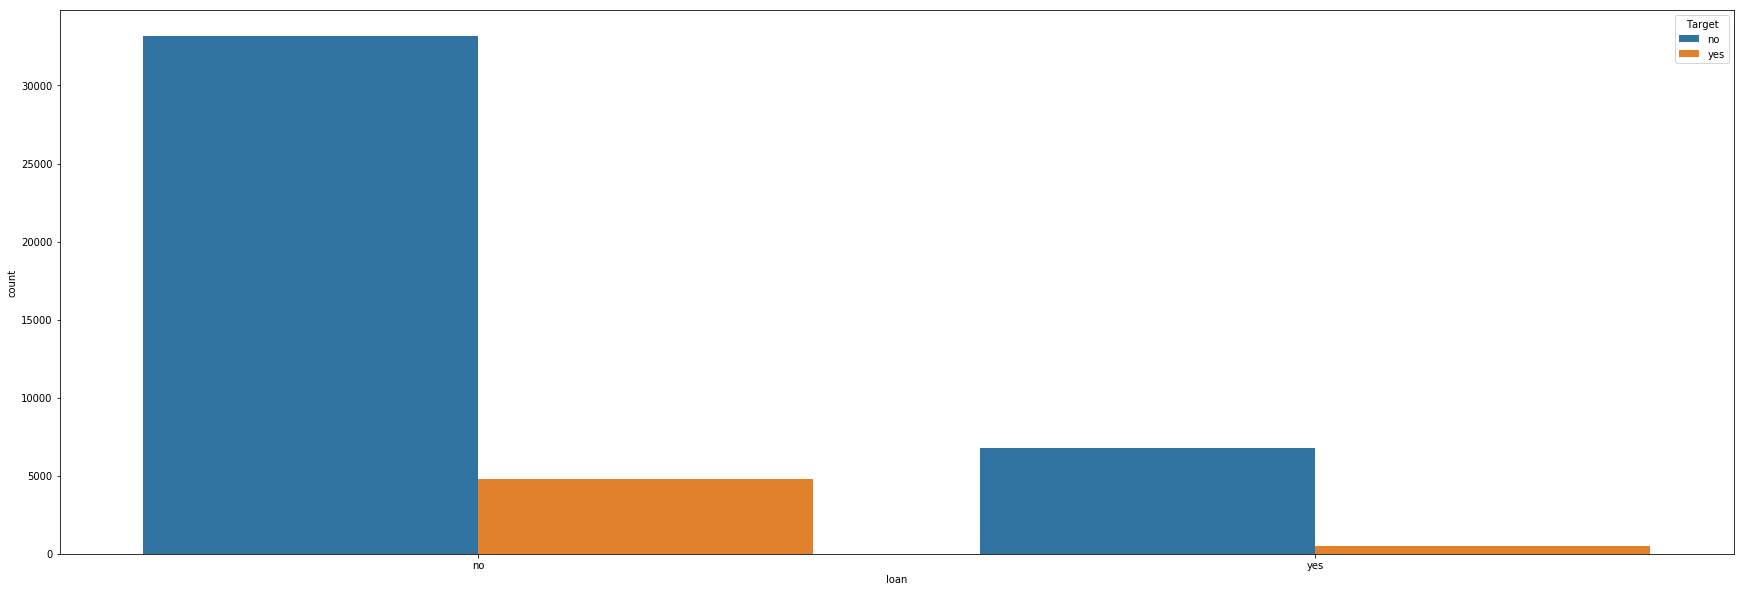

In [379]:

plt.figure(figsize=(30,10))
sns.countplot(x=df['loan'],hue=df['Target'])

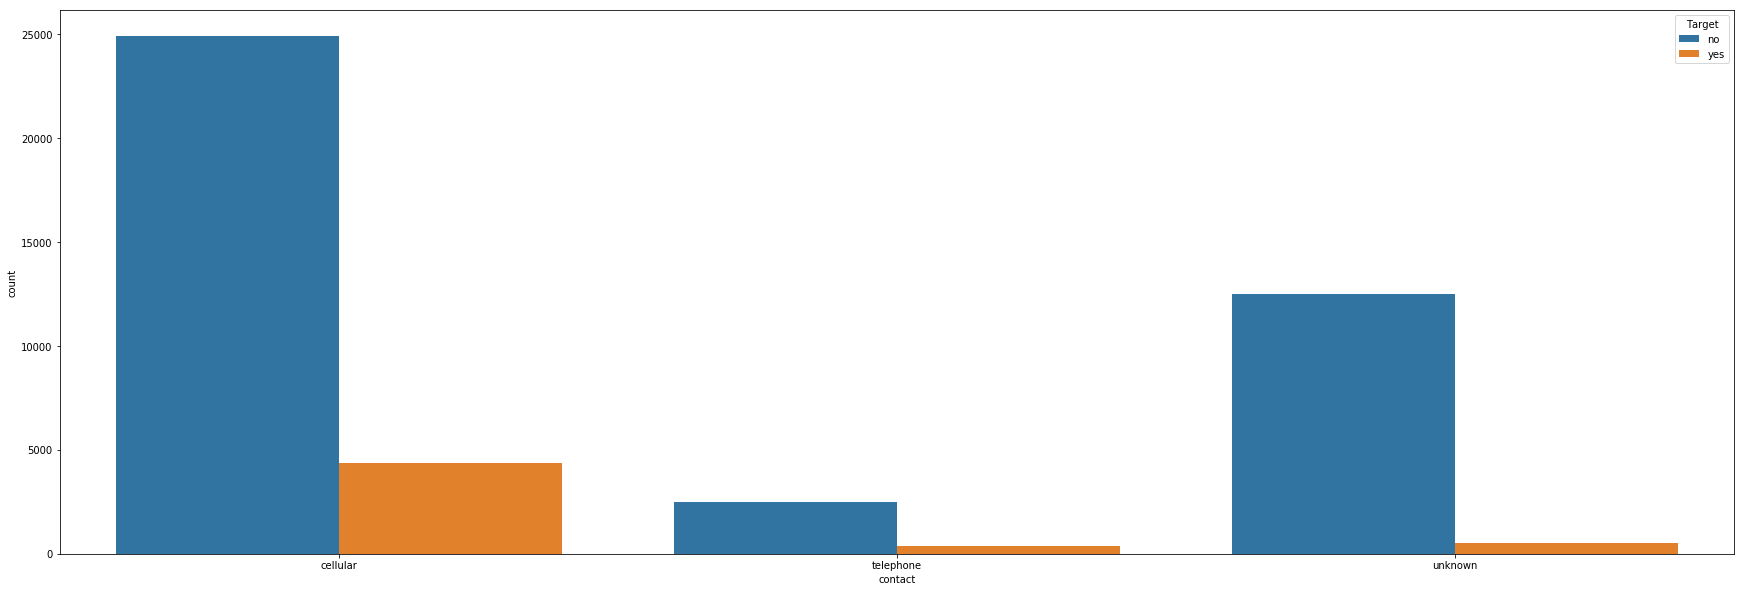

In [380]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['contact'],hue=df['Target'])

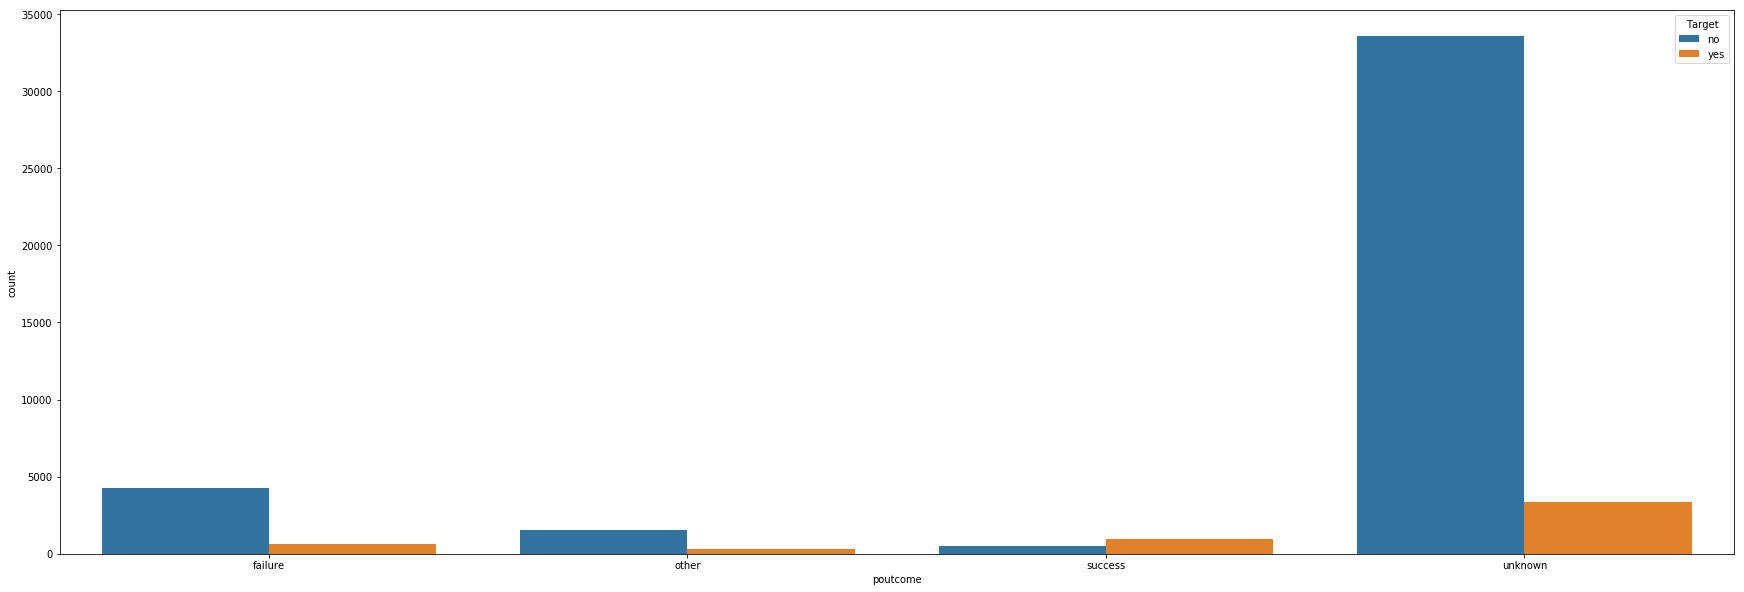

In [381]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['poutcome'],hue=df['Target'])

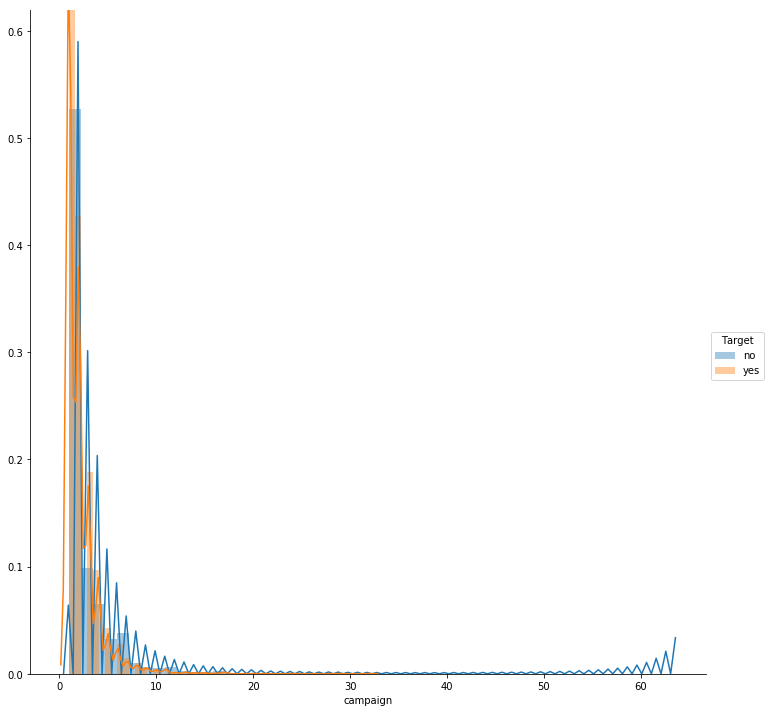

In [382]:
sns.FacetGrid(df,hue="Target",size =10).map(sns.distplot,"campaign").add_legend()

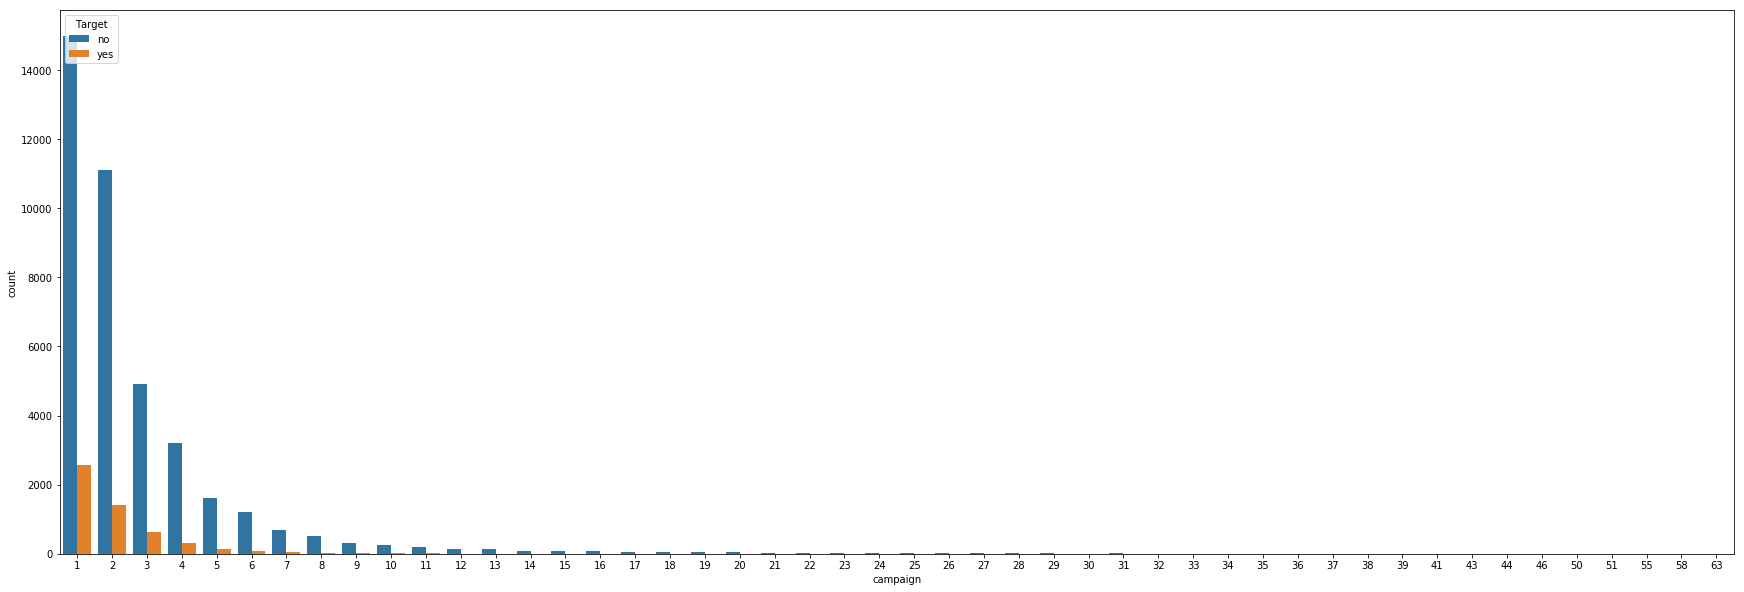

In [383]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['campaign'],hue=df['Target'])

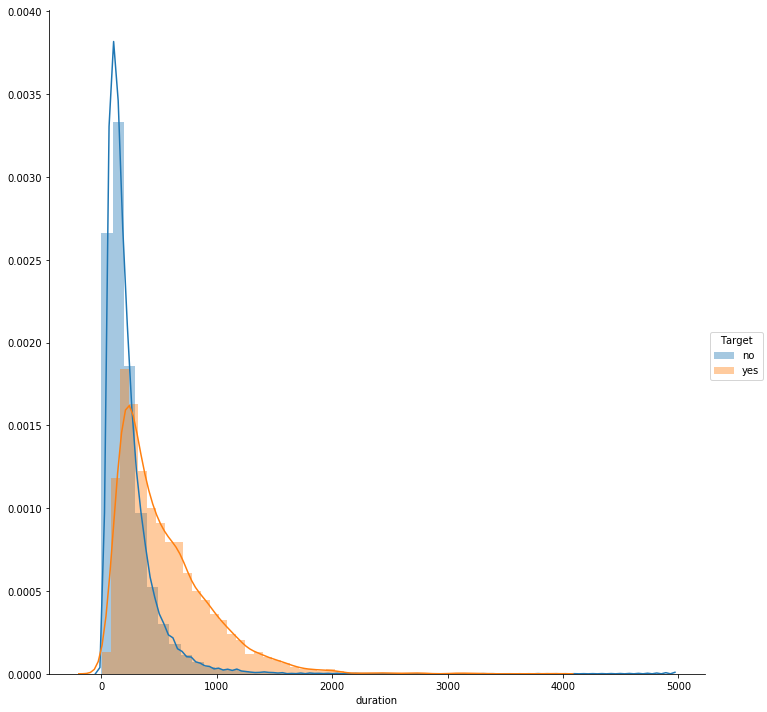

In [384]:
sns.FacetGrid(df,hue="Target",size =10).map(sns.distplot,"duration").add_legend()

#### As duration gets higher, customers are more likely to subscribe for term loan

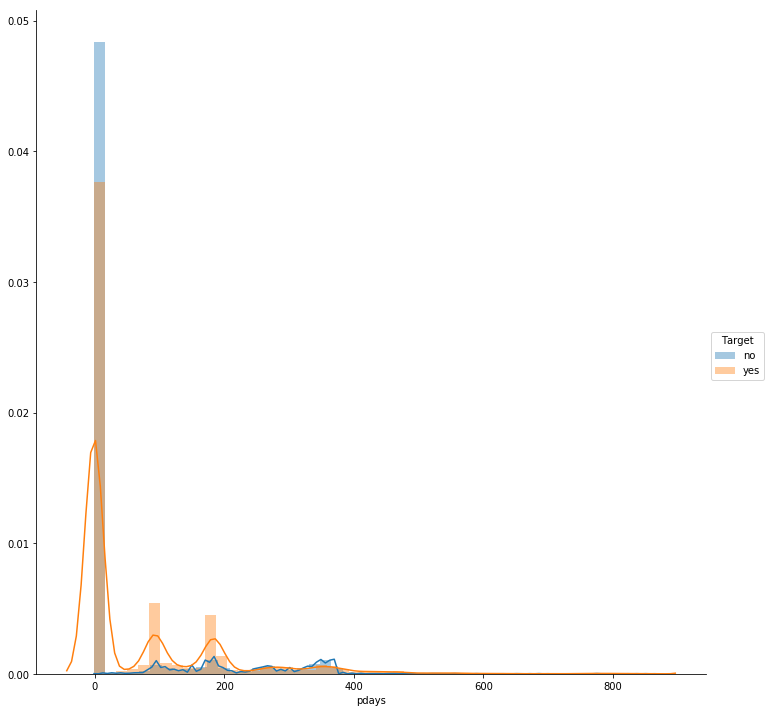

In [385]:
sns.FacetGrid(df,hue="Target",size =10).map(sns.distplot,"pdays").add_legend()

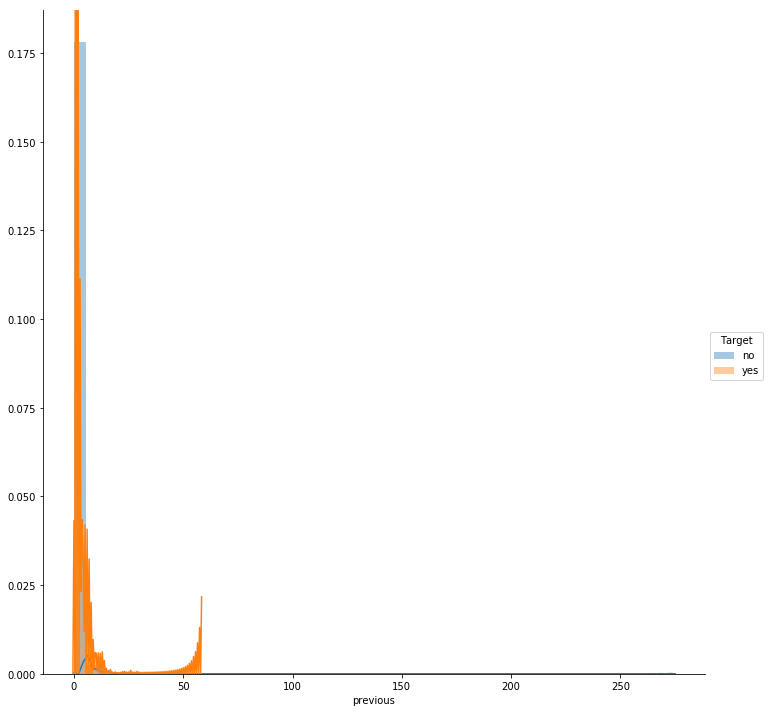

In [386]:
sns.FacetGrid(df,hue="Target",size =10).map(sns.distplot,"previous").add_legend()

In [390]:
# Contingency table

def get_contingency_table(df,Target,var):
    ct_res = pd.crosstab(df[var],df[Target],margins=True)
    ct_res["Accepted (%)"]=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns=["All"])

# data_crosstab = pd.crosstab(df['education'], 
#                             data['Target'],  
#                                margins = True) 


In [397]:
replaceStruct = {"Target":     {"no": 0, "yes": 1 } }
df=df.replace(replaceStruct)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


In [416]:
# totals=pd.crosstab(df['poutcome'],df['Target'],margins=False).reset_index()
# percentages = pd.crosstab(df['poutcome'],df['Target']).apply(lambda row: row/row.sum(),axis=1).reset_index()
# summaryTable=pd.merge(totals,percentages,on="poutcome")
# summaryTable.columns=['poutcome','#False','#True','percentFalse','percentTrue']
# print(summaryTable)


## Contingency table

def get_contingency_table(df,target,var):
    ct_res = pd.crosstab(df[var],df[target],margins=True)
    ct_res['Accepted (%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(Columns=['All'])

In [417]:
get_contingency_table(df,'Target','poutcome')


TypeError: drop() got an unexpected keyword argument 'Columns'

In [335]:
print(df.job.value_counts())
print(df.marital.value_counts())
print(df.education.value_counts())
print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
print(df.contact.value_counts())
print(df.month.value_counts())
print(df.poutcome.value_counts())
print(df.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [336]:
replaceStruct = {
                "job":     {"unknown": -1,"unemployed": 1,"housemaid": 2,"unemployed": 3,"retired": 4,"student": 5,"services": 6,"technician": 7,"admin": 8,"self-employed": 9,"blue-collar": 10,"management": 11,"entrepreneur": 12},
                "marital": {"single": 1, "married":2 , "divorsed": 3},
                 "education": {"unknown": -1,"primary": 1,"secondary": 2,"tertiary": 2},
                 "default":     {"yes": 1, "no": 0},
                "housing":     {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 },
                "contact": {"unknown": -1,"cellular": 1,"telephone": 2},
                "month" :{"jan": 1,"feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},
                "poutcome": {"unknown": -1,"failure": 1,"other": 2,"success": 3},
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "Target":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["job","marital","education","default","housing","loan","contact","month","poutcome"]

In [337]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)


,age,balance,day,duration,campaign,pdays,previous,Target,job_-1,job_2,...,month_7,month_8,month_9,month_10,month_11,month_12,poutcome_-1,poutcome_1,poutcome_2,poutcome_3
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,42,2,5,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
age                 45211 non-null int64
balance             45211 non-null int64
day                 45211 non-null int64
duration            45211 non-null int64
campaign            45211 non-null int64
pdays               45211 non-null int64
previous            45211 non-null int64
Target              45211 non-null int64
job_-1              45211 non-null uint8
job_2               45211 non-null uint8
job_3               45211 non-null uint8
job_4               45211 non-null uint8
job_5               45211 non-null uint8
job_6               45211 non-null uint8
job_7               45211 non-null uint8
job_9               45211 non-null uint8
job_10              45211 non-null uint8
job_11              45211 non-null uint8
job_12              45211 non-null uint8
job_admin.          45211 non-null uint8
marital_1           45211 non-null uint8
marital_2           45211 non-

In [339]:
def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

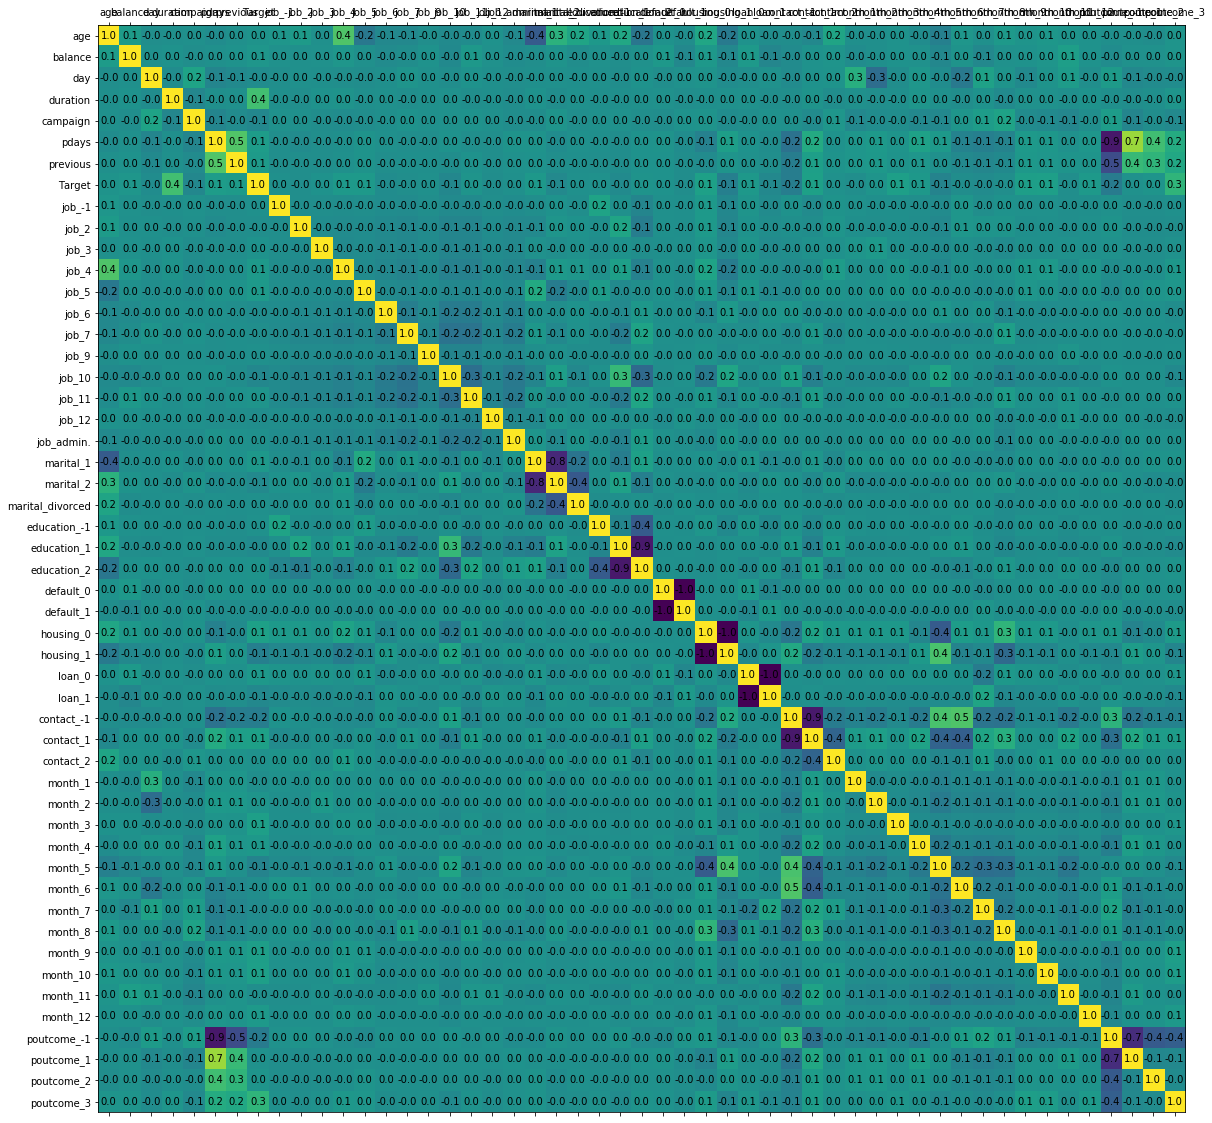

In [340]:
plot_corr(df)

KeyError: 'education'

TypeError: drop() got an unexpected keyword argument 'columns'